In [1]:
#cd ./OneDrive - BEFIVE/_MASTER IA/_PROJET/NLP/GITHUB_anaele
%cd ./GITHUB_anaele

[WinError 2] Le fichier spécifié est introuvable: './GITHUB_anaele'
C:\Users\anaele.baudant\OneDrive - BEFIVE\_MASTER IA\_PROJET\NLP\GITHUB_anaele


In [2]:
import os
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet
from string import punctuation
import numpy as np
import pandas as pd
from logger import logger
import matplotlib.pyplot as plt

from anaele_features import preprocess_sentence, preprocess_dataset, get_corpus, get_words, get_vocabulary, pos_synset_score, show_scores, show_top_error, show_examples 
from anaele_features import feature0_scores, feature1_scores, feature2_scores, feature3_scores, feature4_5_scores, feature6_scores, feature7_scores, feature8_scores 
# not loaded : load_data,
from anaele_features import extract_features, post_process_data, test_models_with_feature_combinations

In [3]:
#make sure these are imported on your computer
#import nltk
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

**1. DATASET PRE-PROCESSING & FEATURE GENERATION**
---

In [4]:
#Chargement du dataset

#dataset=load_data() ,# bug: probleme d'encodage (environnement ?)
#import sys
#print(sys.getdefaultencoding())

def load_data():
    data = dict()
    for fn in os.listdir("stsbenchmark"):
        if fn.endswith(".csv"):
            with open("stsbenchmark/" + fn,encoding='utf-8') as f:
                subset = fn[:-4].split("-")[1]
                logger.info(f"subset: %s", subset)
                data[subset] = dict()
                data[subset]['data'] = []
                data[subset]['scores'] = []
                for l in f:
                    # genre filename year score sentence1 sentence2 (and sources, sometimes)
                    l = l.strip().split("\t")
                    data[subset]['data'].append((l[5], l[6]))
                    data[subset]['scores'].append(float(l[4]))
    return data

In [5]:
#chargement de la base de donnée
dataset=load_data()

# preprocessing data (will convert to a Pandas Dataframe)
preprocessed_train = preprocess_dataset(dataset['train'],load_pickle="anaele_preproc_train.pkl") # 0=pre-processing | "preproc_train.pkl" = load file
preprocessed_test = preprocess_dataset(dataset['test'],load_pickle="anaele_preproc_test.pkl")   # 0=pre-processing | "preproc_test.pkl" = rload file
preprocessed_dev = preprocess_dataset(dataset['dev'],load_pickle="anaele_preproc_dev.pkl")     # 0=pre-processing | "preproc_dev.pkl" = reload file

preprocessed_train.to_pickle("anaele_preproc_train.pkl")
preprocessed_test.to_pickle("anaele_preproc_test.pkl")
preprocessed_dev.to_pickle("anaele_preproc_dev.pkl")

2023-11-28 21:42:54,172 | INFO     | 1349715455.py.load_data l.13 | subset: dev
2023-11-28 21:42:54,172 | INFO     | 1349715455.py.load_data l.13 | subset: test
2023-11-28 21:42:54,185 | INFO     | 1349715455.py.load_data l.13 | subset: train
2023-11-28 21:42:54,196 | INFO     | anaele_features.py.preprocess_dataset l.111 | Loading preprocessed dataset
2023-11-28 21:42:54,224 | INFO     | anaele_features.py.preprocess_dataset l.111 | Loading preprocessed dataset
2023-11-28 21:42:54,232 | INFO     | anaele_features.py.preprocess_dataset l.111 | Loading preprocessed dataset


In [6]:
# feature extraction (features 0 to 8)
preprocessed_train=extract_features(preprocessed_train, load_pickle="anaele_features_train.pkl") # 0=feature extraction | "features_train.pkl" = load file

#save preprocessed data to file
preprocessed_train.to_pickle("anaele_features_train.pkl")

2023-11-28 21:43:01,500 | INFO     | anaele_features.py.extract_features l.167 | Creation of synonym columns completed
2023-11-28 21:43:13,664 | INFO     | anaele_features.py.extract_features l.171 | Extraction completed for feature 0 Jaccard
2023-11-28 21:43:31,324 | INFO     | anaele_features.py.extract_features l.173 | Extraction completed for feature 1 distances
2023-11-28 21:43:42,265 | INFO     | anaele_features.py.extract_features l.175 | Extraction completed for feature 2 synonyms
2023-11-28 21:43:53,618 | INFO     | anaele_features.py.extract_features l.177 | Extraction completed for feature 3 TF-IDF
2023-11-28 21:44:21,352 | INFO     | anaele_features.py.extract_features l.180 | Extraction completed for feature 4 n-grams
2023-11-28 21:44:59,355 | INFO     | anaele_features.py.extract_features l.182 | Extraction completed for feature 5 n-grams with synonyms
2023-11-28 21:45:10,908 | INFO     | anaele_features.py.extract_features l.184 | Extraction completed for feature 7 TF-ID

In [7]:
#visualisation of the dataset after feature extraction
preprocessed_train.head()

,data,scores,s1,s2,sm,nostem_1,nostem_2,token_1,token_2,token_m,...,scores_4_cosine_1,scores_4_cosine_2,scores_4_cosine_3,scores_5_cosine_1_syn,scores_5_cosine_2_syn,scores_5_cosine_3_syn,scores_6,scores_7,scores_8,scores_8_syn
0,"(A plane is taking off., An air plane is takin...",5.00,A plane is taking off.,An air plane is taking off.,A plane is taking off. An air plane is taking ...,plane taking,air plane taking,"[plane, take]","[air, plane, take]","[plane, take, air, plane, take]",...,0.816497,0.707107,0.0,0.816497,0.707107,0.0,1.000000,0.999106,0.800000,0.800000
1,"(A man is playing a large flute., A man is pla...",3.80,A man is playing a large flute.,A man is playing a flute.,A man is playing a large flute. A man is playi...,man playing large flute,man playing flute,"[man, play, larg, flute]","[man, play, flute]","[man, play, larg, flute, man, play, flute]",...,0.866025,0.408248,0.0,0.866025,0.408248,0.0,0.999897,0.958803,0.857143,0.857143
2,(A man is spreading shreded cheese on a pizza....,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,A man is spreading shreded cheese on a pizza. ...,man spreading shreded cheese pizza,man spreading shredded cheese uncooked pizza,"[man, spread, shrede, chees, pizza]","[man, spread, shred, chees, uncook, pizza]","[man, spread, shrede, chees, pizza, man, sprea...",...,0.730297,0.223607,0.0,0.730297,0.223607,0.0,0.999662,0.974177,0.727273,0.727273
3,"(Three men are playing chess., Two men are pla...",2.60,Three men are playing chess.,Two men are playing chess.,Three men are playing chess. Two men are playi...,three men playing chess,two men playing chess,"[three, men, play, chess]","[two, men, play, chess]","[three, men, play, chess, two, men, play, chess]",...,0.750000,0.666667,0.5,0.750000,0.666667,0.5,1.000000,0.998338,0.750000,0.750000
4,"(A man is playing the cello., A man seated is ...",4.25,A man is playing the cello.,A man seated is playing the cello.,A man is playing the cello. A man seated is pl...,man playing cello,man seated playing cello,"[man, play, cello]","[man, seat, play, cello]","[man, play, cello, man, seat, play, cello]",...,0.866025,0.408248,0.0,0.866025,0.408248,0.0,0.999320,0.998704,0.857143,0.857143


<Axes: >

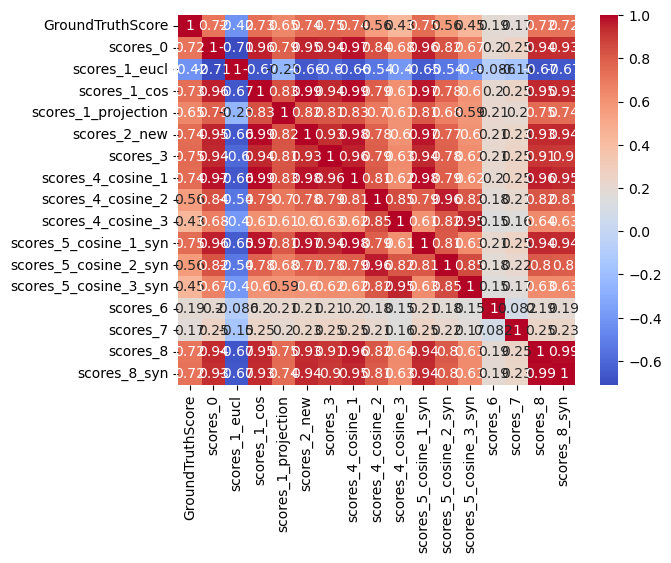

In [9]:
# COLINEARITY EXPLORATION - all features
import seaborn as sns
compare=['GroundTruthScore','scores_0','scores_1_eucl','scores_1_cos','scores_1_projection','scores_2_new','scores_3',   
     'scores_4_cosine_1','scores_4_cosine_2','scores_4_cosine_3', 
     'scores_5_cosine_1_syn','scores_5_cosine_2_syn','scores_5_cosine_3_syn',
     'scores_6','scores_7','scores_8','scores_8_syn']
features=preprocessed_train.loc[:,compare]
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: >

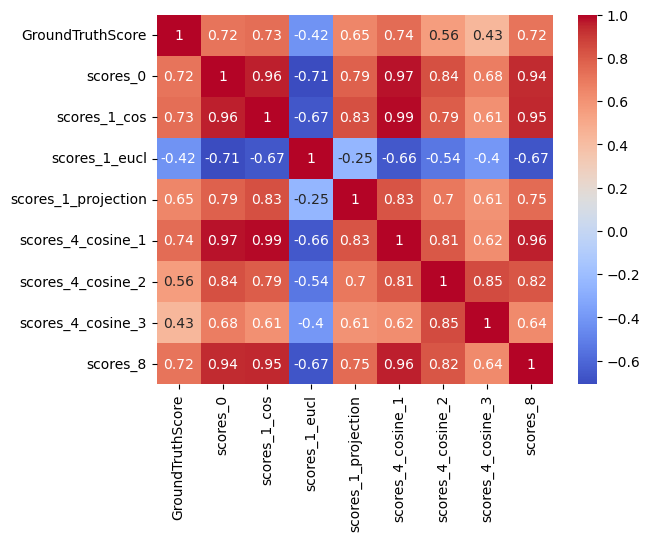

In [10]:
#CORELATION MATRIX FOR WORD TO WORD DISTANCES
compare1= ['GroundTruthScore','scores_0','scores_1_cos','scores_1_eucl', 'scores_1_projection',
        'scores_4_cosine_1','scores_4_cosine_2','scores_4_cosine_3',
           'scores_8']#,'scores_2_new','scores_8_syn']

features1=preprocessed_train[compare1]
corr_matrix1 = features1.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')

<Axes: >

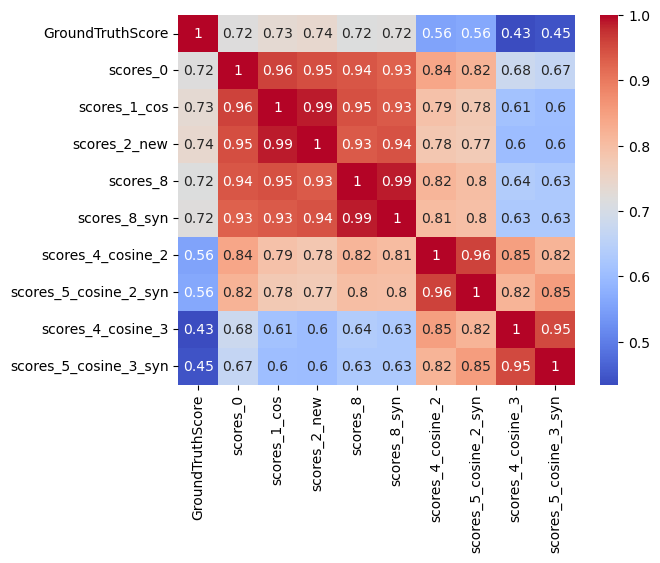

In [12]:
compare2=['GroundTruthScore','scores_0','scores_1_cos','scores_2_new','scores_8','scores_8_syn',
        'scores_4_cosine_2','scores_5_cosine_2_syn','scores_4_cosine_3','scores_5_cosine_3_syn']
features2=preprocessed_train[compare2]
corr_matrix2 = features2.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')


<Axes: >

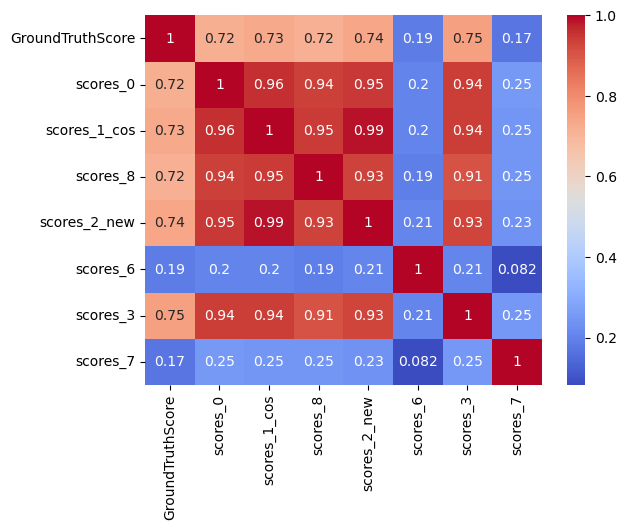

In [15]:
compare3=['GroundTruthScore','scores_0','scores_1_cos','scores_8','scores_2_new',   
     'scores_6','scores_3','scores_7']
features3=preprocessed_train.loc[:,compare3]
corr_matrix3 = features3.corr()
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm')

In [ ]:
show_stats(preprocessed_train, 'GroundTruthScore', scores_2_new)
show_stats(preprocessed_train, 'GroundTruthScore', scores_8_syn)

**2. TINTIN ILLUSTRATION**
---
**Thomson and Thompson**
![tintin_eng.png](attachment:tintin_eng.png)

In [ ]:
#Tintin illustration of the features with 
tintin1='Nothing ?!? That is odd.'
tintin2='to be precise: How curious ? Nothing...'
tintin2_proxy='to be precise: How odd ? Nothing...' # to simulate scores with synonyms and full punctuation removal
tintin={'data':[(tintin1,tintin2),(tintin1,tintin2_proxy)],'scores':[5,5]}
pp_tintin=preprocess_dataset(tintin, load_pickle=0)

# feature extraction (features 0 to 8)
extract_features(pp_tintin, load_pickle=0)#"tintin_features.pkl") # 0=feature extraction | "features_train.pkl" = load file
pp_tintin.to_pickle("tintin_features.pkl")

#pp_tintin.head()

In [ ]:
#score2 removed (equivalent to 1 with synonyms)
#score5 removed (equivalent to 4 with synonyms)
show=['token_1','token_2','GroundTruthScore', 'scores_0',
      'scores_1_cos','scores_3',
     'scores_4_cosine_2','scores_4_cosine_3',
     'scores_6','scores_7','scores_8']
show_tintin = np.round(pp_tintin[show],2)
show_tintin =show_tintin.T
#show_tintin.iloc['score_mean',:]=[0,0]
#show_tintin.iloc['score_mean',0] =show_tintin.iloc[4:,0].mean()
show_tintin.columns=['initial sentence','with synonyms']
show_tintin

In [ ]:
#cosine distance
a=[1,1,0,0,0]
b=[1,0,1,1,1]
np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
#cosine([1,1,0,0,0],[1,0,1,1,1])

In [ ]:
#cosine distance with synonims
a=[1,1,0,0]
b=[1,1,1,1]
np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
#cosine([1,1,0,0],[1,1,1,1])

In [ ]:
#synonyms analysis
print(find_synonyms('odd'))
v1=['nothing', 'odd']
v2=['precise', 'curious', 'nothing', '...']
v2_proxi=replace_synonyms_in_vectors(['nothing', 'odd'],['precise', 'curious', 'nothing', '...'])
print('synonym of ',v2,'(for v1) is',v2_proxi)
v3=['precise', 'bizarre', 'nothing', '...']
v3_proxi=replace_synonyms_in_vectors(['nothing', 'odd'],['precise', 'bizarre', 'nothing', '...'])
print('synonym of ',v3,'(for v1) is',v3_proxi)

In [ ]:
#illustration of post-tag
from nltk.tag import pos_tag
print(pp_tintin['token_1'][0]," = ",pos_tag(pp_tintin['token_1'][0]), '=>',pos_synset_score(pp_tintin['token_1'][0]))
print(pp_tintin['token_2'][0],"=",pos_tag(pp_tintin['token_2'][0]), '=>',pos_synset_score(pp_tintin['token_2'][0]))
print('\nWith synonims')
print(pp_tintin['token_1'][1]," = ",pos_tag(pp_tintin['token_1'][1]), '=>',pos_synset_score(pp_tintin['token_1'][1]))
print(pp_tintin['token_2'][1],"=",pos_tag(pp_tintin['token_2'][1]), '=>',pos_synset_score(pp_tintin['token_2'][1]))

**2. ANALYSE DES FEATURES GENERES**
---

In [ ]:
examples = [1, 2, 10, 22,716]
show = ['s1','s2','token_1','token_2','GroundTruthScore','scores_0','scores_1_cos',
        'scores_1_eucl', 'scores_1_projection','scores_2','scores_3',
        'scores_4_cosine_1','scores_4_cosine_2','scores_4_cosine_3',
        'scores_5_cosine_1_syn','scores_5_cosine_2_syn','scores_5_cosine_3_syn',
        'scores_6','scores_7','scores_8']
preprocessed_train[show].iloc[examples]
#df_show = preprocessed_train[show]
#df_show.iloc[examples].head()

In [ ]:
# Showing results
show_scores(preprocessed_train, 'GroundTruthScore', 'scores_0', 100)
temp=preprocessed_train[['token_1','token_2','GroundTruthScore', 'scores_0']]
type(temp)#.iloc[examples,:]
examples = [1, 2, 10, 22,716]
temp.iloc[examples, :]

In [ ]:
#SHOW TOP 3 ERRORS
show_top_error(preprocessed_train, 'GroundTruthScore', 'scores_0') 

In [ ]:
#SHOW 5 EXAMPLES
examples = [1, 2, 10, 22, 716]
show_examples(preprocessed_train, 'GroundTruthScore', 'scores_0', examples)

In [ ]:
top_error=show_top_error(preprocessed_train, 'scores_1_eucl', 'scores_1_cos')
show_scores(preprocessed_train, 'scores_1_eucl', 'scores_1_cos', 200)
top_error
#show_scores(preprocessed_train, 'GroundTruthScore', 'scores_1_cos', 200)
#show_top_error(preprocessed_train, 'GroundTruthScore', 'scores_1_cos')
#show_scores(preprocessed_train, 'GroundTruthScore', 'scores_1_eucl',200)
#show_top_error(preprocessed_train, 'GroundTruthScore', 'scores_1_eucl')
    
 

In [ ]:
 #Analysis of each feature

#liste des features
features = ['GroundTruthScore','scores_0', 'scores_1_cos','scores_1_eucl', 'scores_1_projection','scores_2','scores_3','scores_4_cosine_2','scores_5_cosine','scores_6','scores_7','scores_8']

#CHOISIR LA FEATURE A ANALYSER ICI
score = features[1]
print('======',score,'======')

show_scores(preprocessed_train, features[0], score, 200)
examples = (1, 2, 10, 22)
show_examples(preprocessed_train, features[0], score, examples)
show_top_error(preprocessed_train, features[0], score)


In [ ]:
# FEATURE ANALYSIS

In [ ]:
from nltk.corpus import stopwords
'not' in stopwords.words('english')
'don\'t' in stopwords.words('english')
'no' in stopwords.words('english')
'that\'s' in stopwords.words('english')
'.' in punctuation

In [ ]:
#analyse des lignes retirées pendant le preprocessing # bug sur les lignes
removed=[632, 636, 637, 667, 670, 679, 687, 702, 723, 737, 739, 740, 759,  773, 841, 845]
removed=[631,633,634,635, 637, 667, 670, 679, 687, 702, 723, 737, 739, 740, 759,  773, 841, 845]
df_train=dataset['train']
df_train=pd.DataFrame(df_train['data'])
df_train.iloc[removed]

**SHOWING SCORES**
---

In [ ]:
#FITTING THE LINEAR REGRESSION

def run_models():
    logger.info(f"Starting to load data")
    dataset = load_data()

    another_set = {
        'train': dataset['train'],
        'test': dataset['test']
    }

    logger.info(f"Starting to test models")
    results_df , score_names = test_models_with_feature_combinations(another_set, extract_features, post_process_data)

    #save results in python
    results_df.to_pickle("results.pkl")
    save_score_names = pd.DataFrame(list(score_names.values()), index=score_names.keys(), columns=['Score Names'])
    save_score_names.to_pickle("score_names.pkl")

def get_top_coef(top_25):
    # get the first top R2 score from each model
    result = top_25.sort_values(by=['R2'], ascending=False)
    result = result.drop_duplicates(subset=['model'], keep='first')
    return result


import matplotlib.pyplot as plt

def plot_thetas_from_df(df):
    # Check if DataFrame has the required columns
    required_columns = {'features', 'model', 'MSE', 'R2', 'thetas'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

    # Plotting
    fig, axes = plt.subplots(nrows=len(df), ncols=1, figsize=(10, len(df) * 4))

    for i, row in df.iterrows():
        ax = axes[i] if len(df) > 1 else axes
        ax.bar(row['features'], row['thetas'])
        ax.set_title(f'Model: {row["model"]} - MSE: {row["MSE"]:.5f}, R2: {row["R2"]:.5f}')
        ax.set_ylabel('Theta Values')
        ax.set_xlabel('Features')

    plt.tight_layout()
    plt.show()

# Example usage with a DataFrame 'df'
# df = pd.read_your_dataframe_here()  # Replace with your DataFrame loading method
# plot_thetas_from_df(df)


# logger.debug(f"Starting to combine model. Models: %s", models_to_test)
try:
    #test_something()
    #run_models()

    ## load results from python
    result = pd.read_pickle("results.pkl")
    score_names = pd.read_pickle("score_names.pkl")
    score_names = score_names.to_dict(orient='index')
    score_names = {k: v['Score Names'] for k, v in score_names.items()}
    print(score_names)
    top_25_df = result[result['model'] != 'DecisionTreeRegressor']
    top_25_df = top_25_df.nlargest(25, 'R2')

    #replace indice id by column name
    for index, row in top_25_df.iterrows():
        features = row['features']
        logger.info('features: %s', features)

        my_new_tuple = []
        for indice in features:
            logger.info('indice: %s', indice)
            logger.info('score_names: %s', score_names[indice])
            my_new_tuple.append(score_names[indice])

        top_25_df.at[index, 'features'] = my_new_tuple
    
    print(my_new_tuple)
    top_25_df.at[index, 'features'] = my_new_tuple


    print(top_25_df)

    #print scores mse model and features
    print(top_25_df[['model', 'features', 'R2', 'MSE']])

    r = get_top_coef(top_25_df)
    print(r[['model', 'features', 'R2', 'thetas']])

    plot_thetas_from_df(r)

except Exception as e:
    print(e)
    logger.error(f"Error in main.py: %s", e)
    raise e



